<a href="https://colab.research.google.com/github/AbhigyanSingh97/SMS-Spam-Detection-NLP-/blob/master/NLP_smsspamdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import nltk

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
data = pd.read_csv('/content/drive/My Drive/data/smsspamcollection/SMSSpamCollection',sep = '\t',names = ['label','messages'])

In [6]:
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# Preprocessing and visualising

In [0]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [0]:
stop_words = stopwords.words('english')

In [10]:
data[data['label']=='ham']

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [0]:
ham = ""
spam = ""

for i in data[data['label']=='ham'].messages:
  tokens = i.split()

  for j in range(len(tokens)):
    tokens[j] = tokens[j].lower()

    ham += " ".join(tokens)+" "

for i in data[data['label']=='spam'].messages:
  tokens = i.split()

  for j in range(len(tokens)):
    tokens[j] = tokens[j].lower()

    spam += " ".join(tokens)+" "

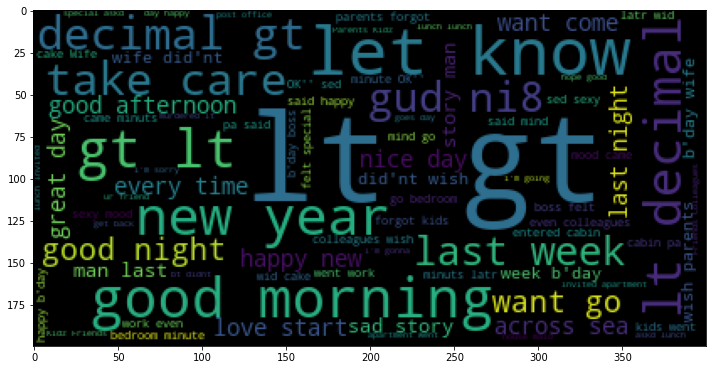

In [12]:
wordcloud = WordCloud(stopwords=stop_words).generate(ham)

plt.figure(figsize = (10,8))
plt.imshow(wordcloud)
plt.tight_layout()

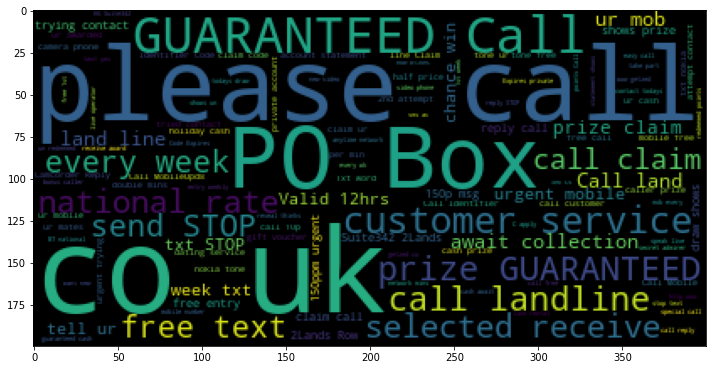

In [13]:
wordcloud = WordCloud(stopwords=stop_words).generate(spam)

plt.figure(figsize = (10,8))
plt.imshow(wordcloud)
plt.tight_layout()

In [14]:
data.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [0]:
data['len'] = data['messages'].apply(len)

In [16]:
data.head()

,label,messages,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


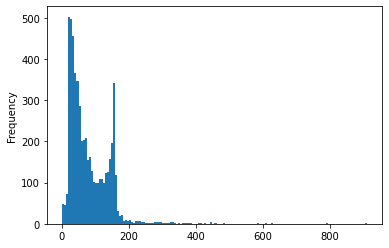

In [17]:
data['len'].plot.hist(bins=150)

In [18]:
data['len'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: len, dtype: float64

In [19]:
data[data['len']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7264584518>,
      dtype=object)

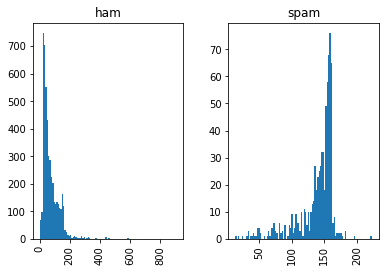

In [20]:
data.hist(column='len',by = 'label',bins = 100)

## Preprocessing

In [21]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:

from nltk.stem import WordNetLemmatizer

In [23]:
data.head()

,label,messages,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [0]:
def text_preprocess(data,x):
  lemmatizer = WordNetLemmatizer()
  for i,row in data.iterrows():
      filter_Sentence = ''

      sentence = row[x]
      sentence = re.sub(r'[^\w\s]','',sentence)

      words = nltk.word_tokenize(sentence)

      words = [w for w in words if not w in stop_words]

      for word in words:
          filter_Sentence = filter_Sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

      data.loc[i,x] = filter_Sentence
  return data

In [0]:
data = text_preprocess(data,'messages')

In [26]:
data.head()

,label,messages,len
0,ham,go jurong point crazy available bugis n great...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry 2 wkly comp win fa cup final tkts ...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah i dont think go usf life around though,61


## Vectorization

In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn import metrics

In [0]:
x = data['messages']
y = data['label']

In [0]:
def word_vectorizer(data):
  count_vec = CountVectorizer().fit(data)
  freq_term_matrix = count_vec.transform(data)
  tfidf = TfidfTransformer(norm = 'l2').fit(freq_term_matrix)
  tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)
  return tf_idf_matrix

In [0]:
x_vec = word_vectorizer(x)

In [31]:
x_vec.shape

(5572, 9136)

In [0]:
y.replace('ham',0,inplace=True)
y.replace('spam',1,inplace=True)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x_vec,y,random_state = 0)

## Logistic Regression

In [0]:
Log_model = LogisticRegression().fit(x_train,y_train)

In [0]:
logpred = Log_model.predict(x_test)

In [36]:
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,logpred))
print('Accuracy:',accuracy_score(y_test,logpred))
print('F1-Score:',f1_score(y_test,logpred))


Confusion Matrix:

[[1207    1]
 [  66  119]]
Accuracy: 0.9519023689877961
F1-Score: 0.780327868852459


## MultinomialNB

In [0]:
mnb_model = MultinomialNB().fit(x_train,y_train)

In [0]:
mnbpred = mnb_model.predict(x_test)

In [39]:
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,mnbpred))
print('Accuracy:',accuracy_score(y_test,mnbpred))
print('F1-Score:',f1_score(y_test,mnbpred))

Confusion Matrix:

[[1208    0]
 [  48  137]]
Accuracy: 0.9655419956927495
F1-Score: 0.8509316770186335


# Using Deep Learning 

In [40]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import LSTM,GRU,Dense,Dropout,Embedding
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


### LSTM

In [0]:
enc_data = [one_hot(words,5000) for words in x]
embedded_data = pad_sequences(enc_data,padding='pre',maxlen=20)

In [0]:
x_final = np.array(embedded_data)
y_final = np.array(y)

In [0]:
X_train,X_val,Y_train,Y_val = train_test_split(x_final,y_final,random_state = 0)

In [0]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(5000,50,input_length=20))
model_LSTM.add(LSTM(100))
model_LSTM.add(Dropout(0.3))
model_LSTM.add(Dense(100,activation='relu'))
model_LSTM.add(Dropout(0.6))
model_LSTM.add(Dense(50,activation='relu'))
model_LSTM.add(Dropout(0.6))
model_LSTM.add(Dense(25,activation='relu'))
model_LSTM.add(Dropout(0.6))
model_LSTM.add(Dense(1,activation='sigmoid'))

model_LSTM.compile(loss = 'binary_crossentropy',optimizer = Adam(),metrics = ['accuracy'])

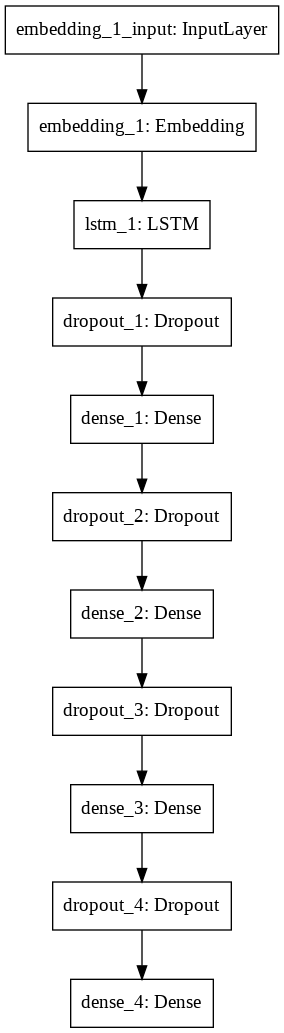

In [45]:
keras.utils.plot_model(model_LSTM)

In [46]:
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 50)            250000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)               

In [0]:
lr_Reduction = ReduceLROnPlateau(monitor='val_loss',patience = 2,min_lr = 0.001)
er = EarlyStopping(monitor='val_accuracy', patience=3)

In [48]:
LSTM_model = model_LSTM.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs = 20,batch_size = 32,callbacks=[lr_Reduction,er])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4179 samples, validate on 1393 samples
Epoch 1/20
4179/4179 [==============================] - 10s 2ms/step - loss: 0.4144 - accuracy: 0.8210 - val_loss: 0.1312 - val_accuracy: 0.9648
Epoch 2/20
4179/4179 [==============================] - 9s 2ms/step - loss: 0.1289 - accuracy: 0.9639 - val_loss: 0.0475 - val_accuracy: 0.9885
Epoch 3/20
4179/4179 [==============================] - 9s 2ms/step - loss: 0.0610 - accuracy: 0.9876 - val_loss: 0.0664 - val_accuracy: 0.9871
Epoch 4/20
4179/4179 [==============================] - 9s 2ms/step - loss: 0.0334 - accuracy: 0.9926 - val_loss: 0.1042 - val_accuracy: 0.9871
Epoch 5/20
4179/4179 [==============================] - 9s 2ms/step - loss: 0.0307 - accuracy: 0.9926 - val_loss: 0.0763 - val_accuracy: 0.9864


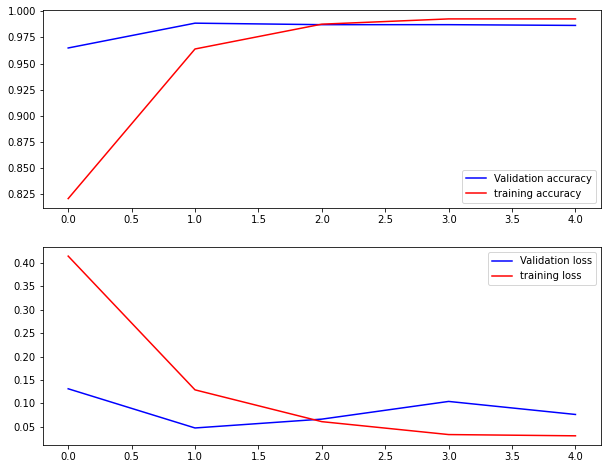

In [49]:
fig,ax = plt.subplots(2,1,figsize = (10,8))
ax[0].plot(LSTM_model.history['val_accuracy'],color='b',label='Validation accuracy')
ax[0].plot(LSTM_model.history['accuracy'],color = 'r',label = 'training accuracy')
legend = ax[0].legend(loc='best')
ax[1].plot(LSTM_model.history['val_loss'],color = 'b',label='Validation loss')
ax[1].plot(LSTM_model.history['loss'],color = 'r',label = 'training loss')
legend = ax[1].legend(loc='best')

## GRU

In [0]:
model_gru = Sequential()
model_gru.add(Embedding(5000,50,input_length=20))
model_gru.add(GRU(100))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(120,activation='relu'))
model_gru.add(Dropout(0.6))
model_gru.add(Dense(60,activation = 'relu'))
model_gru.add(Dropout(0.6))
model_gru.add(Dense(30,activation = 'relu'))
model_gru.add(Dropout(0.6))

model_gru.add(Dense(1,activation = 'sigmoid'))

model_gru.compile(loss = 'binary_crossentropy',optimizer = Adam(),metrics = ['accuracy'])

In [51]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 50)            250000    
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               45300     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               12120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 60)                7260      
_________________________________________________________________
dropout_7 (Dropout)          (None, 60)               

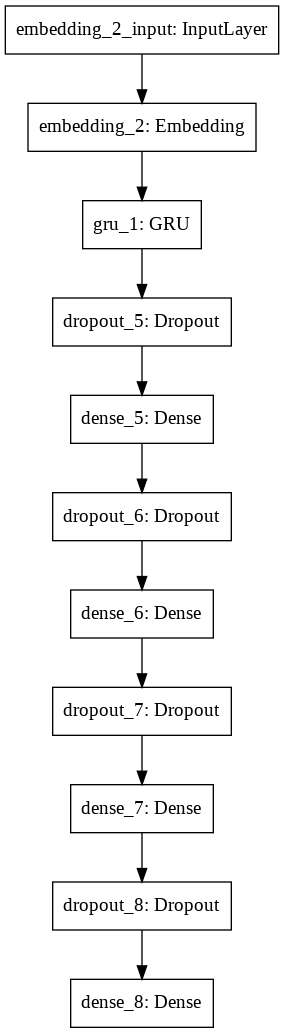

In [52]:
keras.utils.plot_model(model_gru)

In [53]:
gru_model = model_gru.fit(X_train,Y_train,validation_data=[X_val,Y_val],epochs = 20,batch_size = 32,callbacks=[lr_Reduction,er])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4179 samples, validate on 1393 samples
Epoch 1/20
4179/4179 [==============================] - 11s 3ms/step - loss: 0.3378 - accuracy: 0.8593 - val_loss: 0.1374 - val_accuracy: 0.9756
Epoch 2/20
4179/4179 [==============================] - 11s 3ms/step - loss: 0.0993 - accuracy: 0.9737 - val_loss: 0.0514 - val_accuracy: 0.9892
Epoch 3/20
4179/4179 [==============================] - 11s 3ms/step - loss: 0.0396 - accuracy: 0.9902 - val_loss: 0.0688 - val_accuracy: 0.9763
Epoch 4/20
4179/4179 [==============================] - 11s 3ms/step - loss: 0.0216 - accuracy: 0.9945 - val_loss: 0.0745 - val_accuracy: 0.9842
Epoch 5/20
4179/4179 [==============================] - 11s 3ms/step - loss: 0.0120 - accuracy: 0.9964 - val_loss: 0.0897 - val_accuracy: 0.9871


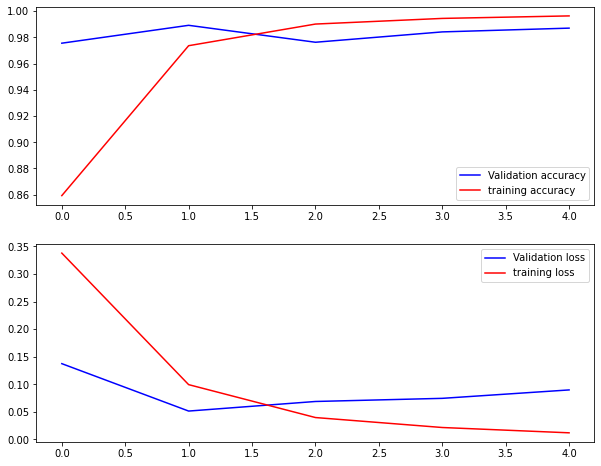

In [54]:
fig,ax = plt.subplots(2,1,figsize = (10,8))
ax[0].plot(gru_model.history['val_accuracy'],color='b',label='Validation accuracy')
ax[0].plot(gru_model.history['accuracy'],color = 'r',label = 'training accuracy')
legend = ax[0].legend(loc='best')
ax[1].plot(gru_model.history['val_loss'],color = 'b',label='Validation loss')
ax[1].plot(gru_model.history['loss'],color = 'r',label = 'training loss')
legend = ax[1].legend(loc='best')